<a href="https://www.kaggle.com/code/domainescully/car-crash-data-visualization?scriptVersionId=116045486" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-crash-dataset/train-new.csv
/kaggle/input/car-crash-dataset/test-new.csv


# Data Visualization 
## Author: Domaine Scully
## January 5th, 2023

In [2]:
df = pd.read_csv('/kaggle/input/car-crash-dataset/test-new.csv')
df

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2
3,10-24,1567.626,alive,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1
4,25-39,31.342,alive,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,10-24,64.757,alive,airbag,none,0,m,37,2001,1999.0,nodeploy,driver,0,6:71:2
8648,1-9km/h,178.651,alive,airbag,none,1,f,16,2001,2001.0,deploy,pass,1,76:57:2
8649,25-39,482.272,alive,airbag,belted,1,m,16,1997,1992.0,deploy,driver,1,74:65:1
8650,55+,32.467,alive,none,belted,1,m,26,1998,1994.0,unavail,driver,0,12:4:2


In [3]:
df = pd.read_csv('/kaggle/input/car-crash-dataset/train-new.csv')
df

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,10-24,131.491,alive,airbag,belted,0,m,28,2002,1997,deploy,driver,1,2:106:1,0
17561,10-24,281.693,alive,none,belted,1,f,39,1998,1987,unavail,driver,0,12:118:1,1
17562,10-24,419.418,alive,airbag,belted,1,f,29,1997,1988,deploy,driver,1,9:37:2,3
17563,40-54,9.815,alive,none,none,1,f,22,2000,1990,unavail,driver,0,49:112:2,3


In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
car_crashes = sns.load_dataset("car_crashes")

## This is illustrating crashes throughout the USA

In [6]:
car_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [7]:
X = car_crashes["total"].values
Y = car_crashes["alcohol"].values
Z = car_crashes["speeding"].values

In [8]:
X

array([18.8, 18.1, 18.6, 22.4, 12. , 13.6, 10.8, 16.2,  5.9, 17.9, 15.6,
       17.5, 15.3, 12.8, 14.5, 15.7, 17.8, 21.4, 20.5, 15.1, 12.5,  8.2,
       14.1,  9.6, 17.6, 16.1, 21.4, 14.9, 14.7, 11.6, 11.2, 18.4, 12.3,
       16.8, 23.9, 14.1, 19.9, 12.8, 18.2, 11.1, 23.9, 19.4, 19.5, 19.4,
       11.3, 13.6, 12.7, 10.6, 23.8, 13.8, 17.4])

In [9]:
Y

array([ 5.64 ,  4.525,  5.208,  5.824,  3.36 ,  3.808,  3.888,  4.86 ,
        1.593,  5.191,  3.9  ,  7.175,  4.437,  4.352,  4.205,  3.925,
        4.272,  4.922,  6.765,  4.53 ,  4.   ,  2.87 ,  3.948,  2.784,
        5.456,  5.474,  9.416,  5.215,  4.704,  3.48 ,  3.136,  4.968,
        3.567,  5.208, 10.038,  4.794,  5.771,  3.328,  5.642,  4.218,
        9.799,  6.402,  5.655,  7.372,  1.808,  4.08 ,  3.429,  3.498,
        6.664,  4.554,  5.568])

In [10]:
Z

array([7.332, 7.421, 6.51 , 4.032, 4.2  , 5.032, 4.968, 6.156, 2.006,
       3.759, 2.964, 9.45 , 5.508, 4.608, 3.625, 2.669, 4.806, 4.066,
       7.175, 5.738, 4.25 , 1.886, 3.384, 2.208, 2.64 , 6.923, 8.346,
       1.937, 5.439, 4.06 , 1.792, 3.496, 3.936, 6.552, 5.497, 3.948,
       6.368, 4.224, 9.1  , 3.774, 9.082, 6.014, 4.095, 7.76 , 4.859,
       4.08 , 2.413, 4.452, 8.092, 4.968, 7.308])

### This diagram is showing alcohol and speed related car crashes

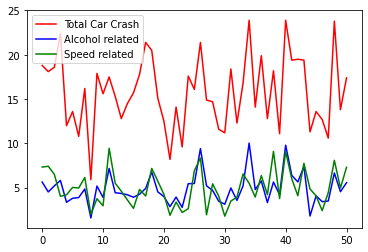

In [11]:
plt.figure()
plt.plot(X, label='Total Car Crash', color='red')
plt.plot(Y, label='Alcohol related', color='blue')
plt.plot(Z, label='Speed related', color='green')
plt.legend()
sns.set()
# sns.set(style='whitegrid')
sns.set_style('darkgrid')
sns.set(font='serif')
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='total'>

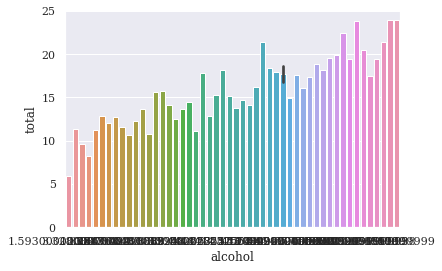

In [12]:
sns.barplot(x='alcohol', y='total', data=car_crashes)